In [1]:
#Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Import finance analysis libraries
import yfinance as yf
import requests

## Enter the Stock Symbol Code for Analysis
Make sure to add according to the symbol in Yahoo Finance

In [8]:
ticker_symbol = input("Enter Stock Symbol: ")

Enter Stock Symbol:  BBCA.JK


In [10]:
period = input("Enter expected period ('1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max'): ")

Enter expected period ('1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max'):  5y


In [121]:
stock_code = yf.Ticker(ticker_symbol)
stock_data = stock_code.history(period=period)

In [180]:
#Another way to extract history data
stock_code = yf.Ticker(ticker_symbol)
stock_data = stock_code.history(start="2019-01-01", end="2024-12-31", interval="1d")

In [182]:
stock_data.reset_index(inplace=True)
stock_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-01-01 00:00:00+07:00,4629.854492,4629.854492,4629.854492,4629.854492,0,0.0,0.0
1,2019-01-02 00:00:00+07:00,4629.853516,4669.919556,4629.853516,4665.467773,35956000,0.0,0.0
2,2019-01-03 00:00:00+07:00,4629.854496,4647.661629,4554.174182,4612.047363,72358000,0.0,0.0
3,2019-01-04 00:00:00+07:00,4607.595454,4634.306152,4563.077624,4634.306152,51465000,0.0,0.0
4,2019-01-07 00:00:00+07:00,4687.726072,4741.147452,4669.918945,4669.918945,73438000,0.0,0.0


In [184]:
import datetime

stock_data['Date'] = pd.to_datetime(stock_data['Date'])

start_date = stock_data['Date'].iloc[0].strftime('%x')
last_date = stock_data['Date'].iloc[-1].strftime('%x')

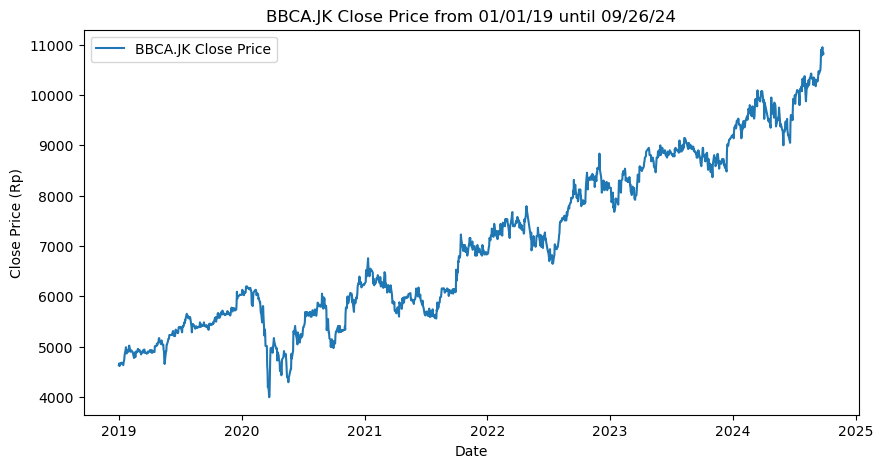

In [186]:
# plot
plt.figure(figsize=(10,5))
plt.plot(stock_data['Date'], stock_data['Close'], label=f'{ticker_symbol} Close Price')
plt.title(f"{ticker_symbol} Close Price from {start_date} until {last_date}")
plt.xlabel('Date')
plt.ylabel('Close Price (Rp)')
plt.legend()
plt.show()

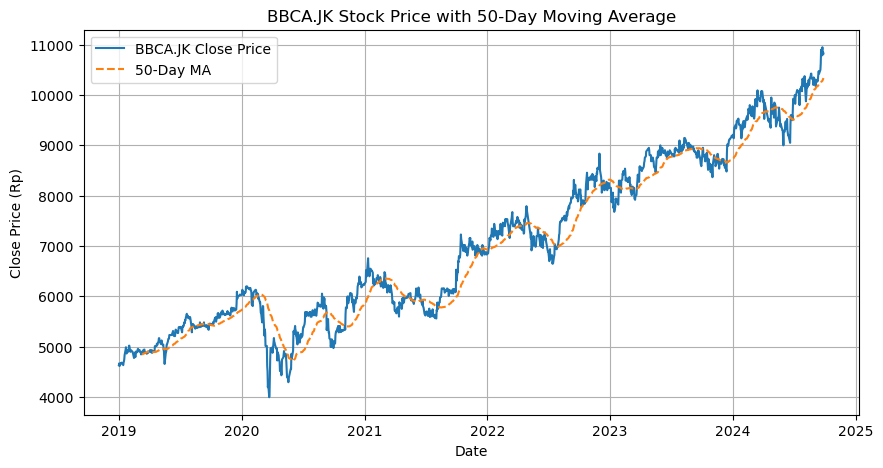

In [188]:
# Calculate the 50-day moving average
stock_data['50_MA'] = stock_data['Close'].rolling(window=50).mean()

# Plot the closing prices and the moving average
plt.figure(figsize=(10, 5))
plt.plot(stock_data['Date'], stock_data['Close'], label=f"{ticker_symbol} Close Price")
plt.plot(stock_data['Date'], stock_data['50_MA'], label='50-Day MA', linestyle='--')
plt.title(f"{ticker_symbol} Stock Price with 50-Day Moving Average")
plt.xlabel('Date')
plt.ylabel('Close Price (Rp)')
plt.legend()
plt.grid(True)
plt.show()

## By month By Year

In [190]:
stock_data['Month'] = stock_data['Date'].dt.month
stock_data['Year'] = stock_data['Date'].dt.year
stock_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,50_MA,Month,Year
0,2019-01-01 00:00:00+07:00,4629.854492,4629.854492,4629.854492,4629.854492,0,0.0,0.0,NaN,1,2019
1,2019-01-02 00:00:00+07:00,4629.853516,4669.919556,4629.853516,4665.467773,35956000,0.0,0.0,NaN,1,2019
2,2019-01-03 00:00:00+07:00,4629.854496,4647.661629,4554.174182,4612.047363,72358000,0.0,0.0,NaN,1,2019
3,2019-01-04 00:00:00+07:00,4607.595454,4634.306152,4563.077624,4634.306152,51465000,0.0,0.0,NaN,1,2019
4,2019-01-07 00:00:00+07:00,4687.726072,4741.147452,4669.918945,4669.918945,73438000,0.0,0.0,NaN,1,2019


In [218]:
stock_data['Close_Growth'] = stock_data['Close'].pct_change() * 100
stock_data['Close_Growth'] = stock_data['Close_Growth'].round(2)
stock_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,50_MA,Month,Year,Close_Growth
0,2019-01-01 00:00:00+07:00,4629.854492,4629.854492,4629.854492,4629.854492,0,0.0,0.0,NaN,1,2019,NaN
1,2019-01-02 00:00:00+07:00,4629.853516,4669.919556,4629.853516,4665.467773,35956000,0.0,0.0,NaN,1,2019,0.77
2,2019-01-03 00:00:00+07:00,4629.854496,4647.661629,4554.174182,4612.047363,72358000,0.0,0.0,NaN,1,2019,-1.15
3,2019-01-04 00:00:00+07:00,4607.595454,4634.306152,4563.077624,4634.306152,51465000,0.0,0.0,NaN,1,2019,0.48
4,2019-01-07 00:00:00+07:00,4687.726072,4741.147452,4669.918945,4669.918945,73438000,0.0,0.0,NaN,1,2019,0.77


In [192]:
print(stock_data.Year.unique())
print(stock_data.Month.sort_values().unique())

[2019 2020 2021 2022 2023 2024]
[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [220]:
#Split stock data
for year in stock_data.Year.unique():
    globals()[f"stock_data_{year}"] = stock_data[stock_data['Year'] == year]
    print(f"The shape for stock data year {year}: ", globals()[f"stock_data_{year}"].shape)

The shape for stock data year 2019:  (258, 12)
The shape for stock data year 2020:  (242, 12)
The shape for stock data year 2021:  (247, 12)
The shape for stock data year 2022:  (246, 12)
The shape for stock data year 2023:  (239, 12)
The shape for stock data year 2024:  (173, 12)


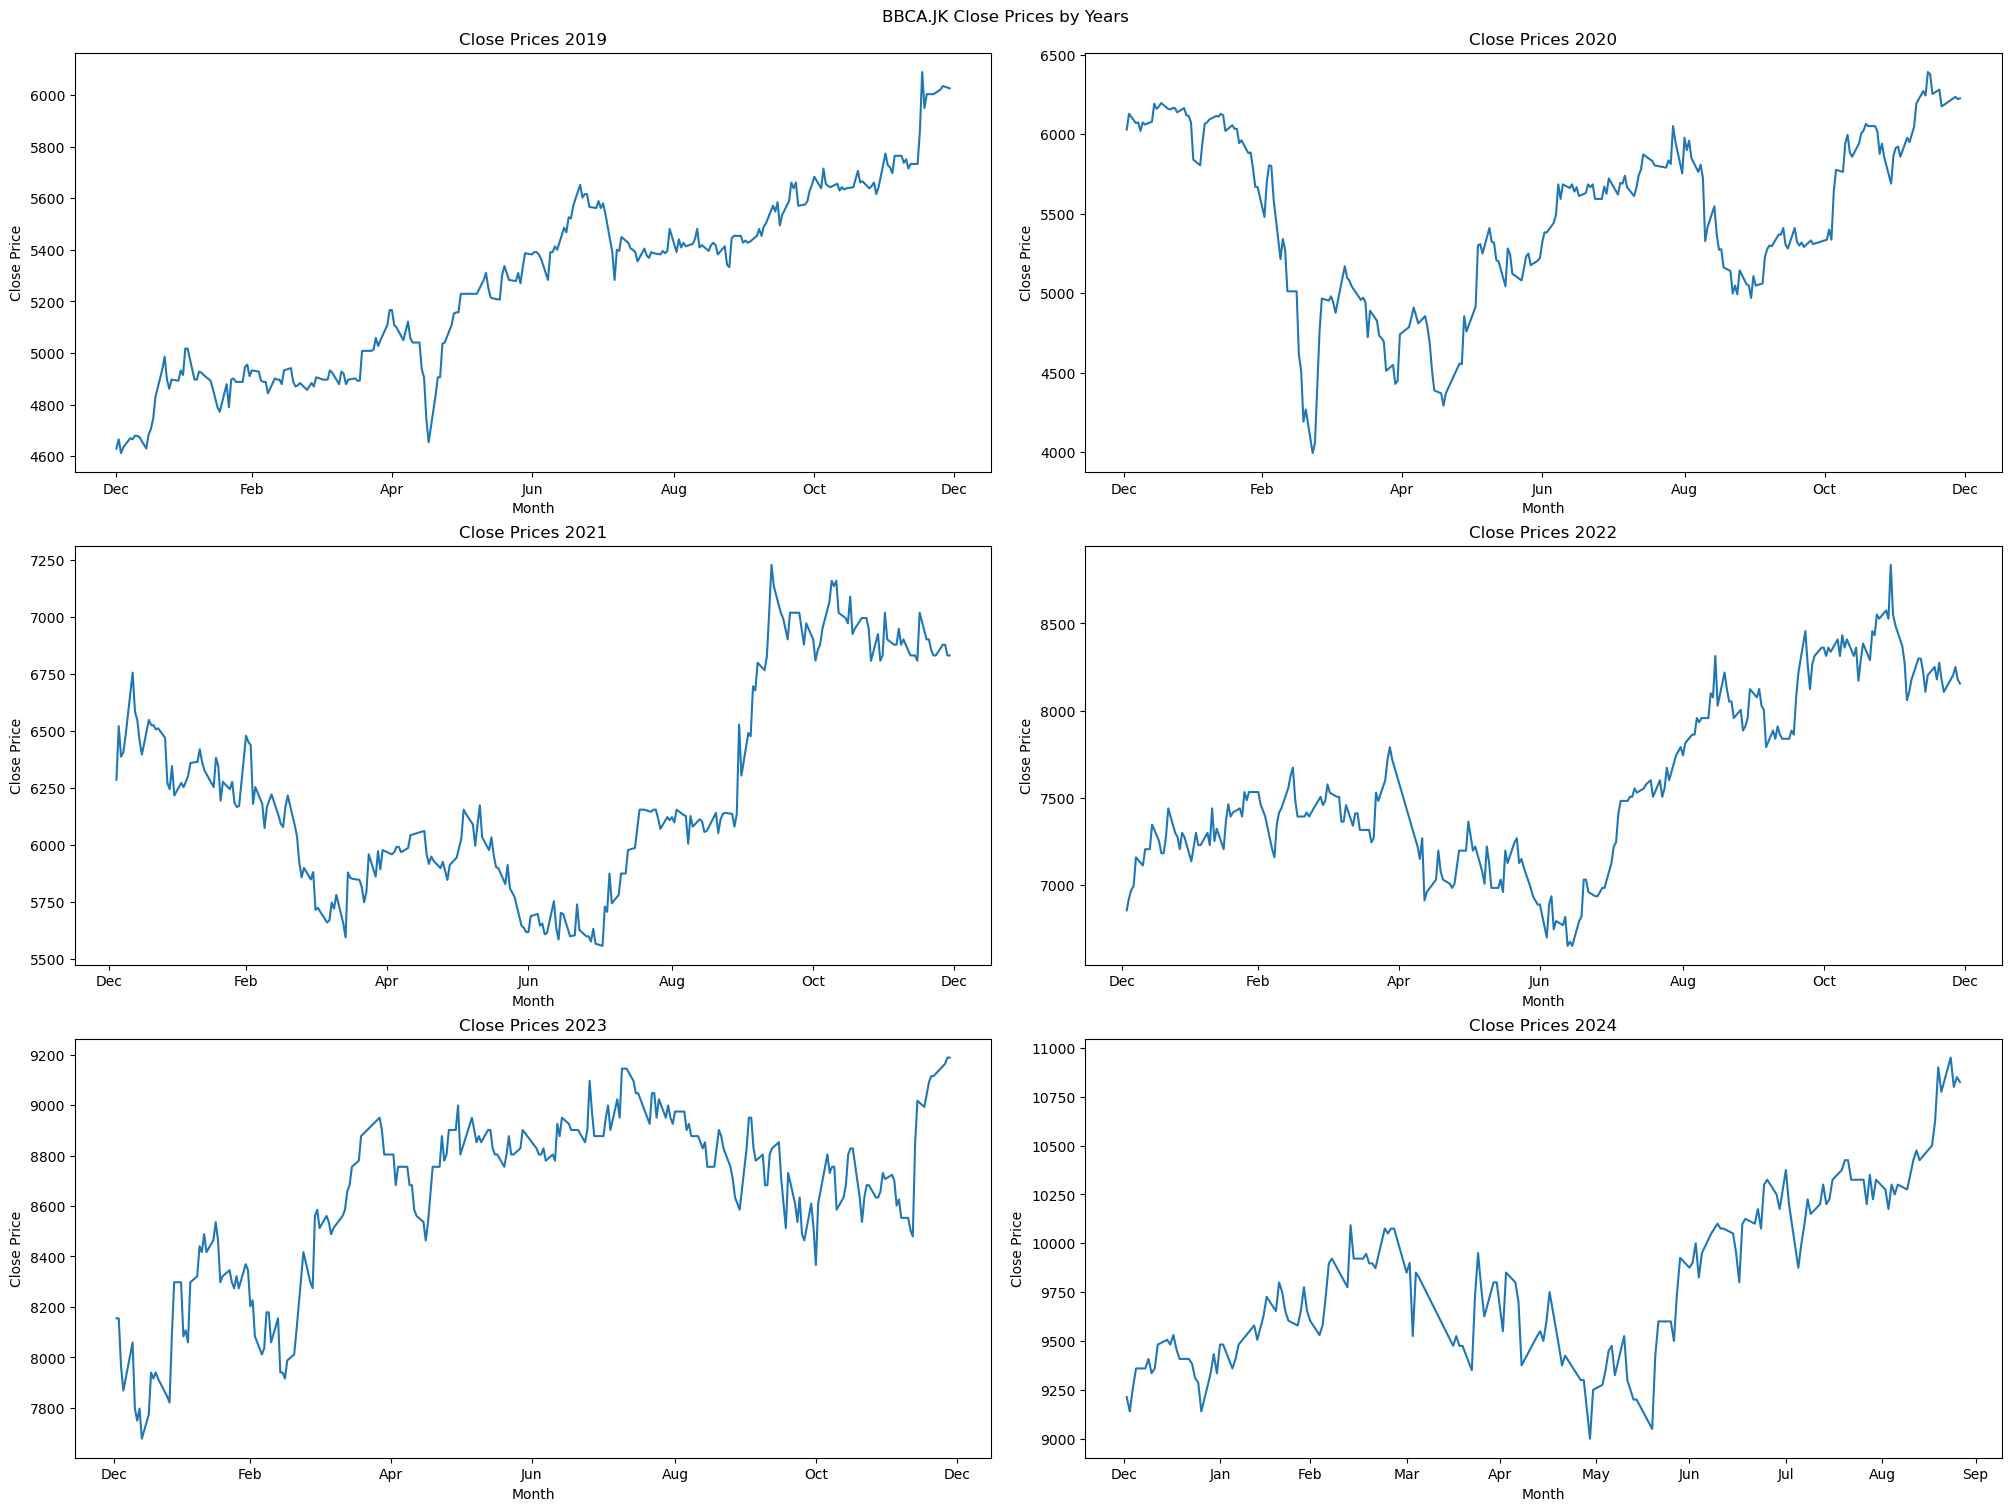

In [212]:
import matplotlib.dates as mdates
fig, axs = plt.subplots(3, 2, figsize = (20, 15), layout="constrained")
fig.suptitle(f"{ticker_symbol} Close Prices by Years")

year = 2019

for row in range(3):
    for col in range(2):
        stock_data_x = globals()[f'stock_data_{year}']
        axs[row, col].plot(stock_data_x["Date"], stock_data_x["Close"])
        axs[row, col].set_title(f'Close Prices {year}')
        axs[row, col].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
        year += 1
for ax in axs.flat:
    ax.set(xlabel='Month', ylabel='Close Price')

plt.show()

### Graph of Close Price with Growth

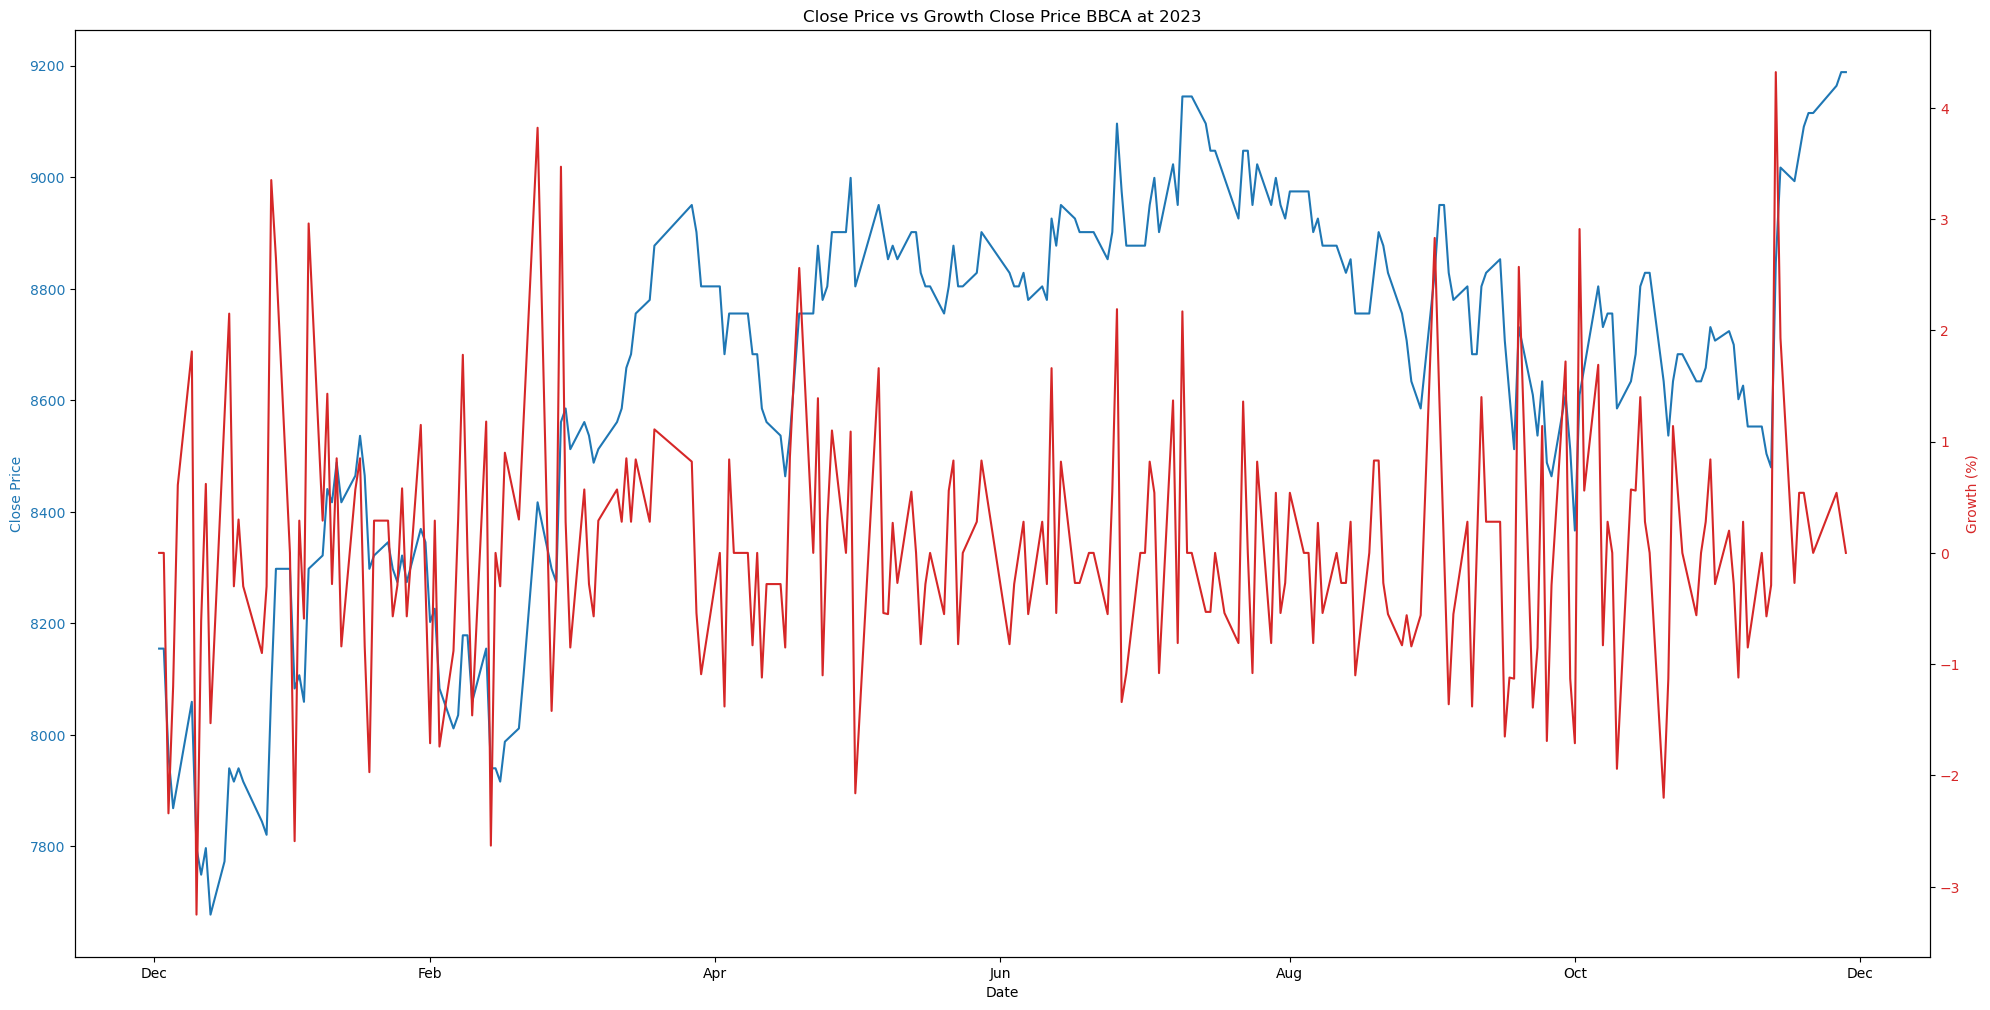

In [276]:
fig, ax1 = plt.subplots(figsize=(20,10))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color=color)
ax1.plot(stock_data_2023['Date'], stock_data_2023['Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Growth (%)', color=color)  # we already handled the x-label with ax1
ax2.plot(stock_data_2023['Date'], stock_data_2023['Close_Growth'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title("Close Price vs Growth Close Price BBCA at 2023")
plt.show()

### Graph of Close Price with Volume

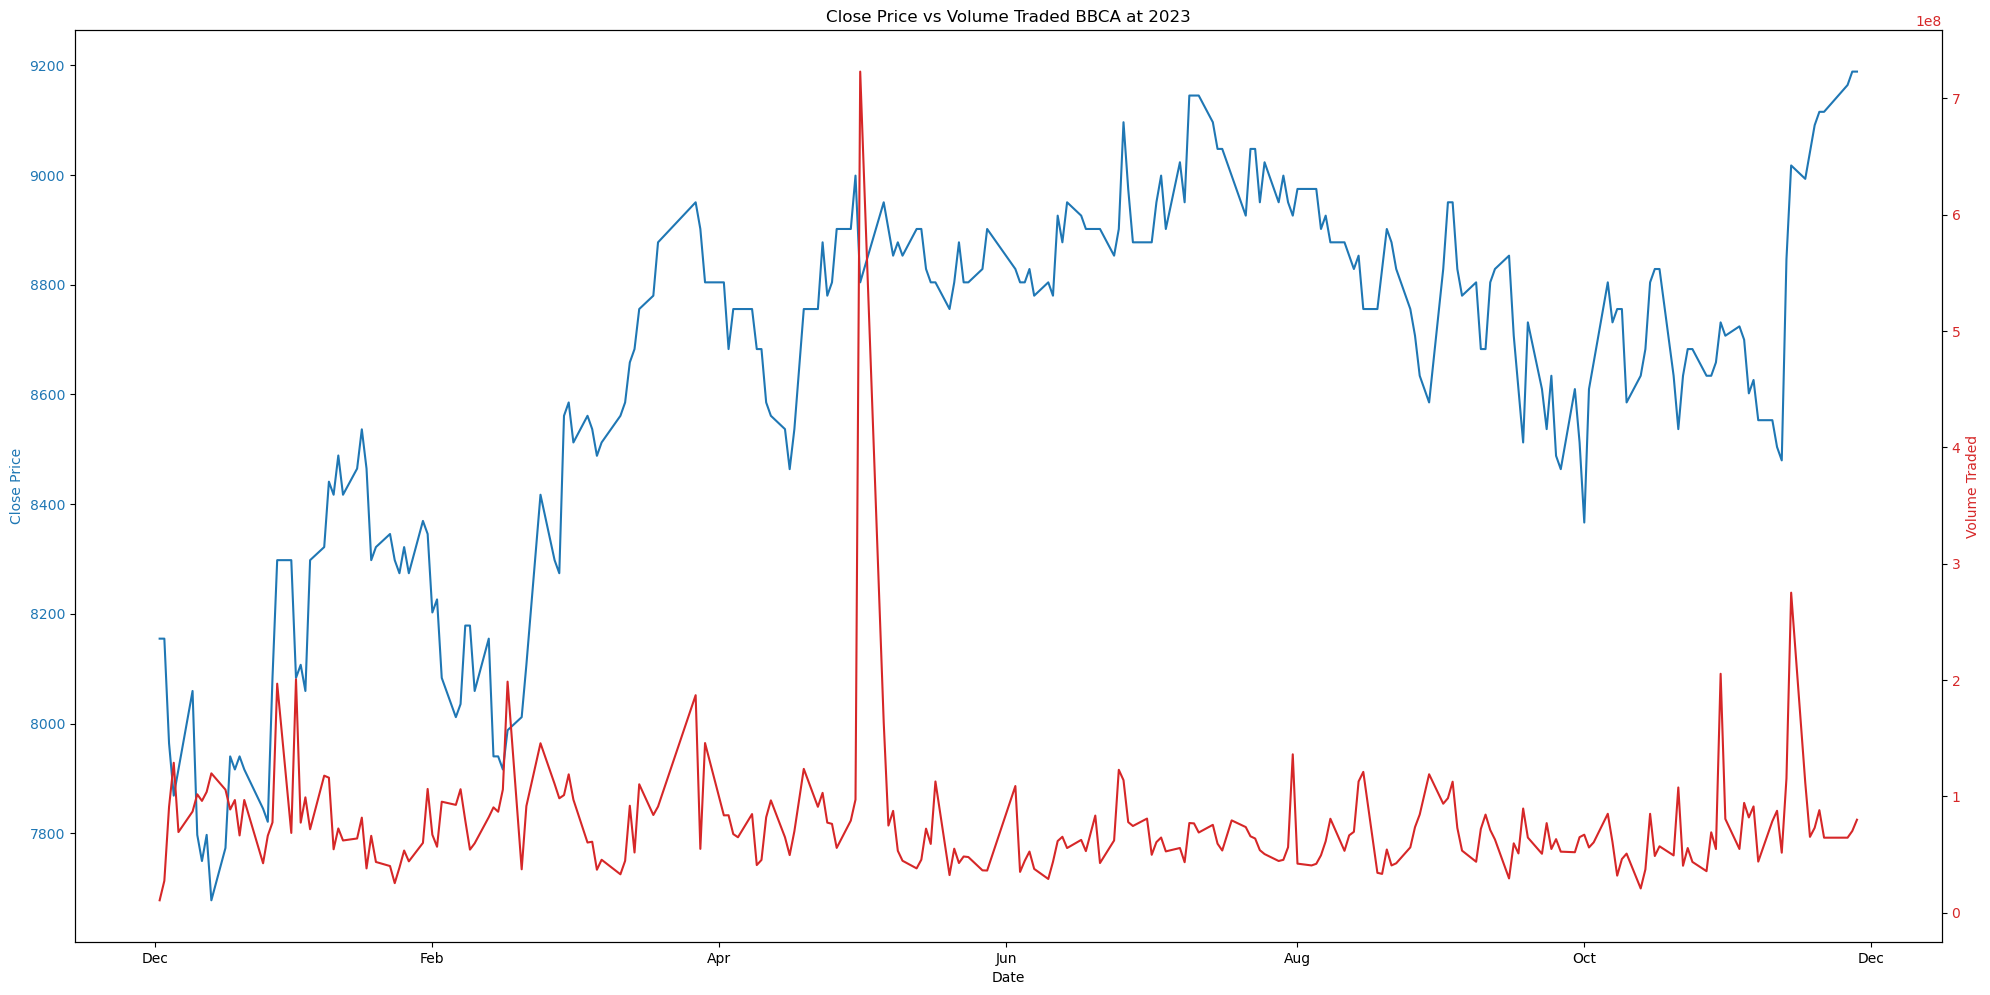

In [274]:
fig, ax1 = plt.subplots(figsize=(20,10))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color=color)
ax1.plot(stock_data_2023['Date'], stock_data_2023['Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Volume Traded', color=color)  # we already handled the x-label with ax1
ax2.plot(stock_data_2023['Date'], stock_data_2023['Volume'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title("Close Price vs Volume Traded BBCA at 2023")
plt.show()

## Price Prediction

In [46]:
train = stock_data.copy()
train.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,50_MA,Year,Month
0,2019-09-25 00:00:00+07:00,5301.124429,5332.571777,5193.304949,5332.571777,88620000,0.0,0.0,NaN,2019,9
1,2019-09-26 00:00:00+07:00,5390.974049,5444.883789,5364.019178,5444.883789,109859000,0.0,0.0,NaN,2019,9
2,2019-09-27 00:00:00+07:00,5395.466434,5458.361131,5390.973956,5453.868652,48010000,0.0,0.0,NaN,2019,9
3,2019-09-30 00:00:00+07:00,5453.868652,5453.868652,5395.466434,5453.868652,73391000,0.0,0.0,NaN,2019,9
4,2019-10-01 00:00:00+07:00,5399.958220,5449.375475,5399.958220,5426.913086,40057000,0.0,0.0,NaN,2019,10


In [48]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

result = adfuller(train['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -0.0689788195339971
p-value: 0.9524420380579774
